In [1]:
%%time

import NORA3_ERA5
import datetime
import matplotlib.pyplot as plt

params_rad = [#"integral_of_toa_net_downward_shortwave_flux_wrt_time"]#, 
        #"integral_of_surface_net_downward_shortwave_flux_wrt_time",
        "integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time"]

params_p = ["snowfall_amount_acc", 
        "precipitation_amount_acc"]

params_other = ["air_temperature_2m",
        "relative_humidity_2m"]

params_clouds = ["cloud_area_fraction", # multiple timeseries in this one???
        "convective_cloud_area_fraction",
        "high_type_cloud_area_fraction",
        "medium_type_cloud_area_fraction",
        "low_type_cloud_area_fraction"]

# TODO:
# Check which file a certain datetime is read from. Is it the latest read file?? 
#
# 3 timers data: fc2020010100_00(3 og 6)_full_sfx.nc
# ASN_VEG
# TALB_ISBA
# ALBVIS_ISBA
#
# 3 timers data: fc2020010100_00(6 og 9).nc
# toa_net_downward_shortwave_flux
# surface_downwelling_shortwave_flux_in_air

# Locations to fetch data for:
# Blindern: 59.9423 E 10.72
# Bergen: N 60.3837 E 5.332
# Trømsø-Holt: N 69.6537 E 18.9368

lon = 10.72
lat = 59.9423

# Period to fetch data for: 2020

#start_time_str = "2020-02-27T00:00:00"
#end_time_str = "2020-02-29T23:00:00"

start_time_str = "2020-07-01T00:00:00"
end_time_str = "2020-07-02T23:00:00"

start_time = datetime.datetime.strptime(start_time_str, "%Y-%m-%dT%H:%M:%S")
end_time = datetime.datetime.strptime(end_time_str, "%Y-%m-%dT%H:%M:%S")

tss = []
for param in params_rad:
    ts = NORA3_ERA5.get_nora3_timeseries(param, lon, lat, start_time, end_time)
    tss.append(ts)

ts = NORA3_ERA5.get_nora3_timeseries("air_temperature_2m", lon, lat, start_time, end_time)


CPU times: user 25.1 s, sys: 17.1 s, total: 42.2 s
Wall time: 21.8 s


<ipython-input-2-e75edd634047>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


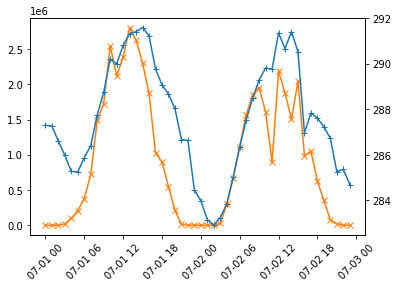

In [2]:
fig, ax1 = plt.subplots() 
ax1.plot(tss[0][:,0,0].time, tss[0][:,0,0].values, color="tab:orange", marker="x")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax2.plot(ts[:,0,0].time, ts[:,0,0].values, color="tab:blue", marker="+")

fig.show()

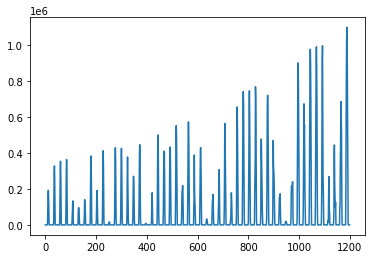

In [1]:
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt

# Read the NORA3 time-series
ncfile = "test.nc"
df = nc.Dataset(ncfile)
time = df.variables["time"][:]
rad_nora = df.variables["integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time"][0][:]

plt.plot(time, rad_nora)


In [6]:
import csv

with open('stationlist.csv') as csv_file:
    input_stations = {
        "stationid": [],
        "longitude": [],
        "latitude": []
    }
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        input_stations["stationid"].append(row[1])
        input_stations["longitude"].append(row[3])
        input_stations["latitude"].append(row[2])
        
        print("{} has lonlat coordinates ({}, {})".format(row[1], row[3], row[2]))

ÅS has lonlat coordinates (10.7818, 59.6605)
DOVRE-LANNEM has lonlat coordinates (9.2143, 62.0172)
HEMSEDAL SKISENTER has lonlat coordinates (8.4968, 60.8397)
FLESLAND has lonlat coordinates (5.2265, 60.2892)
BERGEN - FLORIDA UIB has lonlat coordinates (5.332, 60.3837)
TRONDHEIM - GLØSHAUGEN has lonlat coordinates (10.4072, 63.4153)
KARASJOK - MARKANNJARGA has lonlat coordinates (25.5023, 69.4635)
HOPEN has lonlat coordinates (25.0133, 76.5097)
JAN MAYEN has lonlat coordinates (-8.6690, 70.9394)
GAUSDAL - FOLLEBU has lonlat coordinates (10.2588, 61.22470093)
JUVVASSHØE has lonlat coordinates (8.3690, 61.6775)
RÅDE - TOMB has lonlat coordinates (10.8145, 59.3188)
RYGGE - HUGGENES has lonlat coordinates (10.7543, 59.3980)
LIER has lonlat coordinates (10.2598, 59.7908)
HØNEFOSS - HVERVEN has lonlat coordinates (10.2662, 60.1403)
GRAN has lonlat coordinates (10.5592, 60.3558)
RAMNES - KILE VESTRE has lonlat coordinates (10.2397, 59.3808)
TJØLLING has lonlat coordinates (10.1250, 59.0467)
G

In [ ]:
nc_files = ["air_temperature_2m.nc", 
            "cloud_area_fraction.nc", 
            "convective_cloud_area_fraction.nc", 
            "integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time.nc", 
            "integral_of_surface_net_downward_shortwave_flux_wrt_time.nc"]

all_timeseries = xr.open_mfdataset(nc_files, parallel=True, combine="nested",
                  data_vars='minimal', coords='minimal', compat='override')

all_timeseries.to_netcdf("NORA3.nc", format="NETCDF4", engine="netcdf4", unlimited_dims="time", mode="w")